## Flight Delays and Cancellations: January vs. July

This notebook looks at the number and fraction of delayed and cancelled flights for airports across the U.S. for the months of January and July 2015. Specifically, I want to know if there is a statistically significant difference in the fractions of delayed and cancelled flights between July and January. I hypothesize that the January data will contain larger fractions of delayed and cancelled flights than the July data, based on expectations that inclement winter weather has a measurable effect. I qualitatively test the winter weather hypothesis by looking at the fractions of delayed and cancelled flights as a function of latitude alone and location in the U.S.

Data source is the U.S. DoT Bureau of Transportation Statistics:
http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time

#### First, read in the two csv files corresponding to each month's data:

In [1]:
import pandas as pd
import numpy as np

pd.set_option('max_columns', 10)
pd.set_option('max_rows', 20)

In [2]:
Jan = pd.read_csv("Jan2015flights.csv")

In [3]:
July = pd.read_csv("July2015flights.csv")

In [4]:
Jan.head()

,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_DEL15,CANCELLED,Unnamed: 7
0,2015-01-01,AA,1,JFK,LAX,0.0,0.0,NaN
1,2015-01-01,AA,2,LAX,JFK,0.0,0.0,NaN
2,2015-01-01,AA,3,JFK,LAX,0.0,0.0,NaN
3,2015-01-01,AA,4,LAX,JFK,0.0,0.0,NaN
4,2015-01-01,AA,5,DFW,HNL,1.0,0.0,NaN


In [5]:
July.head()

,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,DEP_DEL15,CANCELLED,Unnamed: 7
0,2015-07-01,AA,37,DFW,SFO,1.0,0.0,NaN
1,2015-07-01,AA,40,BOS,ORD,0.0,0.0,NaN
2,2015-07-01,AA,41,ORD,SEA,0.0,0.0,NaN
3,2015-07-01,AA,42,SEA,ORD,0.0,0.0,NaN
4,2015-07-01,AA,43,DFW,DTW,0.0,0.0,NaN


The selected data includes the flight date, the airline carrier, flight number, origin airport code, destination airport code, a flag indicating whether the flight was delayed more than 15 minutes (1 = yes, 0 = no), and a flag indicating whether the flight was cancelled (1 = yes, 0 = no).

Get rid of extra column:

In [6]:
Jan = Jan.drop(Jan.columns[7],axis=1)
July = July.drop(July.columns[7],axis=1)

#### Calculate the number of cancelled flights for each origin airport
This does assume that the cause of the cancellation is based on conditions at the origin airport.

In [7]:
JanCancel = Jan.groupby(by=['ORIGIN'])['CANCELLED'].sum()
JanCancel.sort_values(inplace=True, ascending=False)
JanCancel[:5]

ORIGIN
ORD    1118.0
LGA     882.0
EWR     659.0
BOS     648.0
DFW     524.0
Name: CANCELLED, dtype: float64

This tells us that origin airport ORD (which I know from experience is Chicago O'Hare) had the most cancelled flights in January 2015.

In [8]:
JulyCancel = July.groupby(by=['ORIGIN'])['CANCELLED'].sum()
JulyCancel.sort_values(inplace=True, ascending=False)
JulyCancel[:5]

ORIGIN
ORD    482.0
LGA    323.0
LAX    283.0
EWR    229.0
SFO    175.0
Name: CANCELLED, dtype: float64

Chicago O'Hare still wins the award for the most cancelled flights in July 2015, but with significantly fewer than in January. Looking at the absolute numbers makes all large, high traffic airports look bad relative to the many smaller airports. A fair comparison needs to normalize by the total number of flights.

In [9]:
JanNumFlights = Jan['ORIGIN'].value_counts()
JanNumFlights[:5]

ATL    29512
ORD    23484
DFW    23153
LAX    17340
DEN    17090
Name: ORIGIN, dtype: int64

In [10]:
JulyNumFlights = July['ORIGIN'].value_counts()
JulyNumFlights[:5]

ATL    33735
ORD    28223
DFW    22895
LAX    19371
DEN    19076
Name: ORIGIN, dtype: int64

In [11]:
JanCancelf = JanCancel/JanNumFlights
JanCancelf.sort_values(inplace=True, ascending=False)
JanCancelf[:5]

CMX    0.183333
TOL    0.179775
DBQ    0.174419
JMS    0.173333
ORH    0.161290
dtype: float64

(Unimportant aside: DBQ is actually my hometown's airport.)

In [12]:
JulyCancelf = JulyCancel/JulyNumFlights
JulyCancelf.sort_values(inplace=True, ascending=False)
JulyCancelf[:5]

UST    0.153846
BRW    0.113924
OTZ    0.080645
EAU    0.064516
CHO    0.063415
dtype: float64

For quick comparison, I've also ranked the airports by their fraction of cancelled flights (a larger number indicates higher fraction and, therefore, worse performance):

In [13]:
JanCancelrank = JanCancelf.rank()
JanCancelrank[:5]

CMX    312.0
TOL    311.0
DBQ    310.0
JMS    309.0
ORH    308.0
dtype: float64

In [14]:
JanCancelrank[-5:]

MLB    14.0
BRW    14.0
DAB    14.0
GUM    14.0
PIB    14.0
dtype: float64

In [15]:
JulyCancelrank = JulyCancelf.rank()
JulyCancelrank[:5]

UST    312.0
BRW    311.0
OTZ    310.0
EAU    309.0
CHO    308.0
dtype: float64

In [16]:
JulyCancelrank[-5:]

COD    35.0
KTN    35.0
JAC    35.0
ITO    35.0
ABE    35.0
dtype: float64

#### Now, do the same for delays

In [17]:
JanDelay = Jan.groupby(by=['ORIGIN'])['DEP_DEL15'].sum()
JanDelay.sort_values(inplace=True, ascending=False)
JanDelay[:5]

ORIGIN
ORD    7168.0
DFW    5499.0
DEN    5043.0
ATL    4719.0
LAX    2971.0
Name: DEP_DEL15, dtype: float64

In [18]:
JulyDelay = July.groupby(by=['ORIGIN'])['DEP_DEL15'].sum()
JulyDelay.sort_values(inplace=True, ascending=False)
JulyDelay[:5]

ORIGIN
ORD    7216.0
ATL    6944.0
LAX    5294.0
DEN    4994.0
DFW    4626.0
Name: DEP_DEL15, dtype: float64

In [19]:
JanDelayf = JanDelay/JanNumFlights
JanDelayf.sort_values(inplace=True, ascending=False)
JanDelayf[:5]

GUM    0.483871
OTH    0.411765
UST    0.375000
BPT    0.354839
TTN    0.334728
dtype: float64

In [20]:
JulyDelayf = JulyDelay/JulyNumFlights
JulyDelayf.sort_values(inplace=True, ascending=False)
JulyDelayf[:5]

ADK    0.666667
GST    0.483871
UST    0.461538
GUM    0.354839
MVY    0.354839
dtype: float64

In [21]:
JanDelayrank = JanDelayf.rank()
JanDelayrank[:5]

GUM    312.0
OTH    311.0
UST    310.0
BPT    309.0
TTN    308.0
dtype: float64

In [22]:
JanDelayrank[-5:]

BRD    5.0
EKO    4.0
BTM    3.0
CNY    1.5
LWS    1.5
dtype: float64

In [23]:
JulyDelayrank = JulyDelayf.rank()
JulyDelayrank[:5]

ADK    312.0
GST    311.0
UST    310.0
GUM    308.5
MVY    308.5
dtype: float64

In [24]:
JulyDelayrank[-5:]

DIK    5.0
AZO    4.0
ESC    3.0
EKO    2.0
LWS    1.0
dtype: float64

### Read in Airport Location Data

I am not familiar with the names and locations of all 312 airport codes in these datasets, so I'm going to supplement with the provided data on airport locations.

In [25]:
locations = pd.read_csv("airport_locations.csv")

In [26]:
locations.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


This dataset provides the airport codes, so I can merge this data frame with the ones including the flight delays and cancellations, below.

### Combine the delayed and cancelled flight info into a data frame for each month:

In [27]:
JanAirpts = pd.concat([JanCancel, JanCancelf, JanCancelrank, JanDelay, JanDelayf, JanDelayrank], axis=1)
JanAirpts.head()

,CANCELLED,0,1,DEP_DEL15,2,3
ABE,5.0,0.030488,184.0,25.0,0.152439,113.0
ABI,14.0,0.058577,261.0,37.0,0.154812,118.0
ABQ,7.0,0.004447,35.0,324.0,0.205845,237.0
ABR,2.0,0.032258,194.5,7.0,0.112903,46.0
ABY,2.0,0.024691,156.5,9.0,0.111111,43.5


In [28]:
JulyAirpts = pd.concat([JulyCancel, JulyCancelf, JulyCancelrank, JulyDelay, JulyDelayf, JulyDelayrank], axis=1)
JulyAirpts.head()

,CANCELLED,0,1,DEP_DEL15,2,3
ABE,0.0,0.000000,35.0,39.0,0.168103,187.0
ABI,1.0,0.004739,100.0,35.0,0.165877,181.0
ABQ,12.0,0.005868,115.0,394.0,0.192665,239.0
ABR,0.0,0.000000,35.0,14.0,0.225806,280.5
ABY,0.0,0.000000,35.0,7.0,0.090909,48.0


Fix header info and copy the index containing the IATA code into a column for matching purposes.

In [29]:
JanAirpts.columns = ['numCancel', 'fracCancel', 'rankCancel','numDelay', 'fracDelay','rankDelay']
JanAirpts['iata'] = JanAirpts.index
JanAirpts.head()

,numCancel,fracCancel,rankCancel,numDelay,fracDelay,rankDelay,iata
ABE,5.0,0.030488,184.0,25.0,0.152439,113.0,ABE
ABI,14.0,0.058577,261.0,37.0,0.154812,118.0,ABI
ABQ,7.0,0.004447,35.0,324.0,0.205845,237.0,ABQ
ABR,2.0,0.032258,194.5,7.0,0.112903,46.0,ABR
ABY,2.0,0.024691,156.5,9.0,0.111111,43.5,ABY


In [30]:
JulyAirpts.columns = ['numCancel', 'fracCancel', 'rankCancel','numDelay', 'fracDelay','rankDelay']
JulyAirpts['iata'] = JulyAirpts.index
JulyAirpts.head()

,numCancel,fracCancel,rankCancel,numDelay,fracDelay,rankDelay,iata
ABE,0.0,0.000000,35.0,39.0,0.168103,187.0,ABE
ABI,1.0,0.004739,100.0,35.0,0.165877,181.0,ABI
ABQ,12.0,0.005868,115.0,394.0,0.192665,239.0,ABQ
ABR,0.0,0.000000,35.0,14.0,0.225806,280.5,ABR
ABY,0.0,0.000000,35.0,7.0,0.090909,48.0,ABY


In [31]:
JanAirpts.loc['ORD',:]

numCancel          1118
fracCancel    0.0476069
rankCancel          238
numDelay           7168
fracDelay      0.305229
rankDelay           302
iata                ORD
Name: ORD, dtype: object

In [32]:
JulyAirpts.loc['ORD',:]

numCancel           482
fracCancel    0.0170783
rankCancel          234
numDelay           7216
fracDelay      0.255678
rankDelay           295
iata                ORD
Name: ORD, dtype: object

### Merge the flight data frames with the airport location data

In [33]:
JanAirLoc = pd.merge(locations, JanAirpts, on='iata', how='inner')
JanAirLoc.head()

,iata,airport,city,state,country,...,fracCancel,rankCancel,numDelay,fracDelay,rankDelay
0,ABE,Lehigh Valley International,Allentown,PA,USA,...,0.030488,184.0,25.0,0.152439,113.0
1,ABI,Abilene Regional,Abilene,TX,USA,...,0.058577,261.0,37.0,0.154812,118.0
2,ABQ,Albuquerque International,Albuquerque,NM,USA,...,0.004447,35.0,324.0,0.205845,237.0
3,ABR,Aberdeen Regional,Aberdeen,SD,USA,...,0.032258,194.5,7.0,0.112903,46.0
4,ABY,Southwest Georgia Regional,Albany,GA,USA,...,0.024691,156.5,9.0,0.111111,43.5


In [34]:
JulyAirLoc = pd.merge(locations, JulyAirpts, on='iata', how='inner')
JulyAirLoc.head()

,iata,airport,city,state,country,...,fracCancel,rankCancel,numDelay,fracDelay,rankDelay
0,ABE,Lehigh Valley International,Allentown,PA,USA,...,0.000000,35.0,39.0,0.168103,187.0
1,ABI,Abilene Regional,Abilene,TX,USA,...,0.004739,100.0,35.0,0.165877,181.0
2,ABQ,Albuquerque International,Albuquerque,NM,USA,...,0.005868,115.0,394.0,0.192665,239.0
3,ABR,Aberdeen Regional,Aberdeen,SD,USA,...,0.000000,35.0,14.0,0.225806,280.5
4,ABY,Southwest Georgia Regional,Albany,GA,USA,...,0.000000,35.0,7.0,0.090909,48.0


In [35]:
JanAirLoc.shape

(309, 13)

In [36]:
JulyAirLoc.shape

(309, 13)

Only 3 airports were 'lost' in the merge.

In [37]:
JanAirLoc.loc[JanAirLoc.iata == 'ORD', :]

,iata,airport,city,state,country,...,fracCancel,rankCancel,numDelay,fracDelay,rankDelay
218,ORD,Chicago O'Hare International,Chicago,IL,USA,...,0.047607,238.0,7168.0,0.305229,302.0


## Plotting the Data

I now have 2 data frames (one for January, one for July) containing airport locations and their flight delay/cancellation numbers. I can use these data frames to look at the distribution of delayed and cancelled flights across all airports.

In [38]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rc('font', family='serif')
plt.rc('font', serif='Computer Modern Roman')
plt.rc('text', usetex='true')
rcParams['axes.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 15
rcParams['axes.titlesize'] = 15

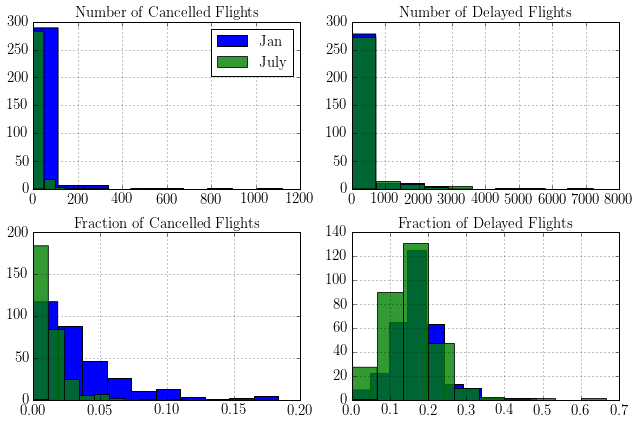

In [39]:
plt.figure(figsize=(9,6))

plt.subplot(221)
plt.title('Number of Cancelled Flights')
JanAirLoc.numCancel.hist(label='Jan')
JulyAirLoc.numCancel.hist(alpha=0.8, label='July')
plt.legend()

plt.subplot(222)
plt.title('Number of Delayed Flights')
JanAirLoc.numDelay.hist()
JulyAirLoc.numDelay.hist(alpha=0.8)

plt.subplot(223)
plt.title('Fraction of Cancelled Flights')
JanAirLoc.fracCancel.hist()
JulyAirLoc.fracCancel.hist(alpha=0.8)

plt.subplot(224)
plt.title('Fraction of Delayed Flights')
JanAirLoc.fracDelay.hist()
JulyAirLoc.fracDelay.hist(alpha=0.8)

plt.tight_layout()

An easy way to see if the January and July distributions are different in a statistical sense is through a t-test. However, this assumes the data follow a normal distribution, so I want to do a quick check using a probability plot.  

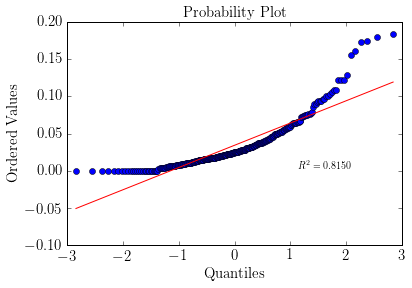

In [40]:
import scipy.stats as stats
import pylab

stats.probplot(JanAirLoc['fracCancel'].values, dist="norm", plot=pylab)
pylab.show()

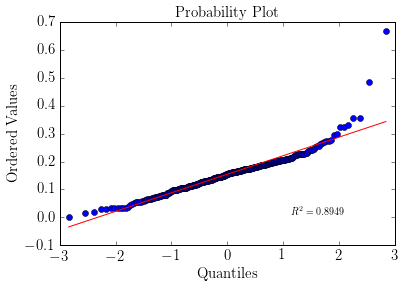

In [41]:
stats.probplot(JulyAirLoc['fracDelay'].values, dist="norm", plot=pylab)
pylab.show()

The plots reveal that only ~68% of the cancelled flight fraction data and ~95% of the delayed flight fraction data follow a normal distribution. There are a number of outliers at the high end in both distributions, and the large number of airports with no cancelled flights skews that distribution. Even so, the t-test can still give us a sense as to whether the January and July data are statistically different from one another.

In [42]:
stats.ttest_ind(a=JanAirLoc['fracCancel'].values, b=JulyAirLoc['fracCancel'].values, equal_var=False)

Ttest_indResult(statistic=11.017969304620481, pvalue=6.7300113597602092e-25)

The extremely small p-value here means that it is very much statistically unlikely that the January and July distributions in cancelled flight fractions are the same.

In [43]:
stats.ttest_ind(a=JanAirLoc['fracDelay'].values, b=JulyAirLoc['fracDelay'].values, equal_var=False)

Ttest_indResult(statistic=3.0644976941161883, pvalue=0.0022772134176005515)

The p-value here tells us that we can rule out the delayed flight fraction being the same for January and July at a 95% confidence level.

In [44]:
def airportStats (data):
    print "mean: %f" % np.mean(data)
    print "median: %f" % np.median(data)
    print "standard deviation: %f" % np.std(data)

In [45]:
airportStats(JanAirLoc['fracCancel'])

mean: 0.034353
median: 0.024691
standard deviation: 0.032867


In [46]:
airportStats(JulyAirLoc['fracCancel'])

mean: 0.012044
median: 0.008772
standard deviation: 0.013509


The January flight cancellation data has larger mean, median, and standard deviation than the July data, as hypothesized.

In [47]:
airportStats(JanAirLoc['fracDelay'])

mean: 0.170577
median: 0.172053
standard deviation: 0.061388


In [48]:
airportStats(JulyAirLoc['fracDelay'])

mean: 0.154359
median: 0.154210
standard deviation: 0.069699


The January flight delay data has a slightly larger mean and median, but similar standard deviation as the July data.

## Airport Location Plots

Now that I know the distributions for January and July are different enough to be statistically significant, I can perform some qualitative tests to see if location of the airports has an influence on the flight delay and cancellation fractions. 

The first quick test is to just plot the delayed and cancelled flight fractions against latitude of the airports. If winter weather is a factor, I would expect airports at higher latitudes to have larger fractions of delayed and cancelled flights, especially in the January data.

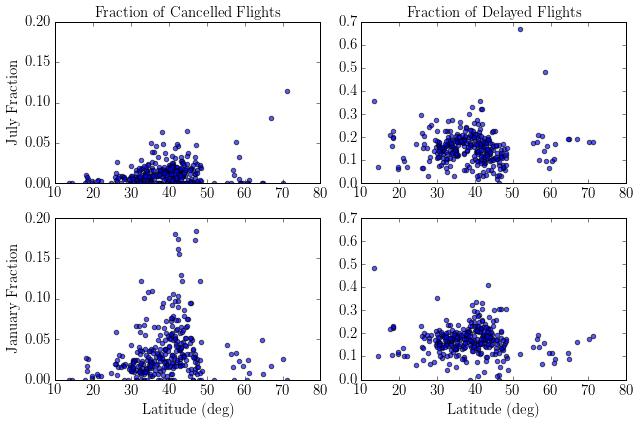

In [49]:
plt.figure(figsize=(9,6))

plt.subplot(221)
plt.scatter(JulyAirLoc.lat, JulyAirLoc.fracCancel, alpha=0.65)
plt.ylim(0,0.2)
plt.ylabel('July Fraction')
plt.title('Fraction of Cancelled Flights')

plt.subplot(222)
plt.scatter(JulyAirLoc.lat, JulyAirLoc.fracDelay, alpha=0.65)
plt.ylim(0,0.7)
plt.title('Fraction of Delayed Flights')

plt.subplot(223)
plt.scatter(JanAirLoc.lat, JanAirLoc.fracCancel, alpha=0.65)
plt.ylim(0,0.2)
plt.xlabel('Latitude (deg)')
plt.ylabel('January Fraction')

plt.subplot(224)
plt.scatter(JanAirLoc.lat, JanAirLoc.fracDelay, alpha=0.65)
plt.ylim(0,0.7)
plt.xlabel('Latitude (deg)')

plt.tight_layout()

While there is not a noticeable difference between the delayed flight fractions in July (top right) and January (bottom right), there is significantly more scatter in the cancelled flight fractions in January (bottom left) than July (top left). While there is not a simple linear relationship between cancelled flight fraction and latitude, there does appear to be some trend in January, with a peak in cancellation fraction at mid-latitudes around 40-50 degrees.

There are obviously factors other than latitude which affect winter weather patterns, so it is more informative to visualize this data on a map.

In [50]:
from mpl_toolkits.basemap import Basemap

In [51]:
colorScale = plt.cm.get_cmap('jet')

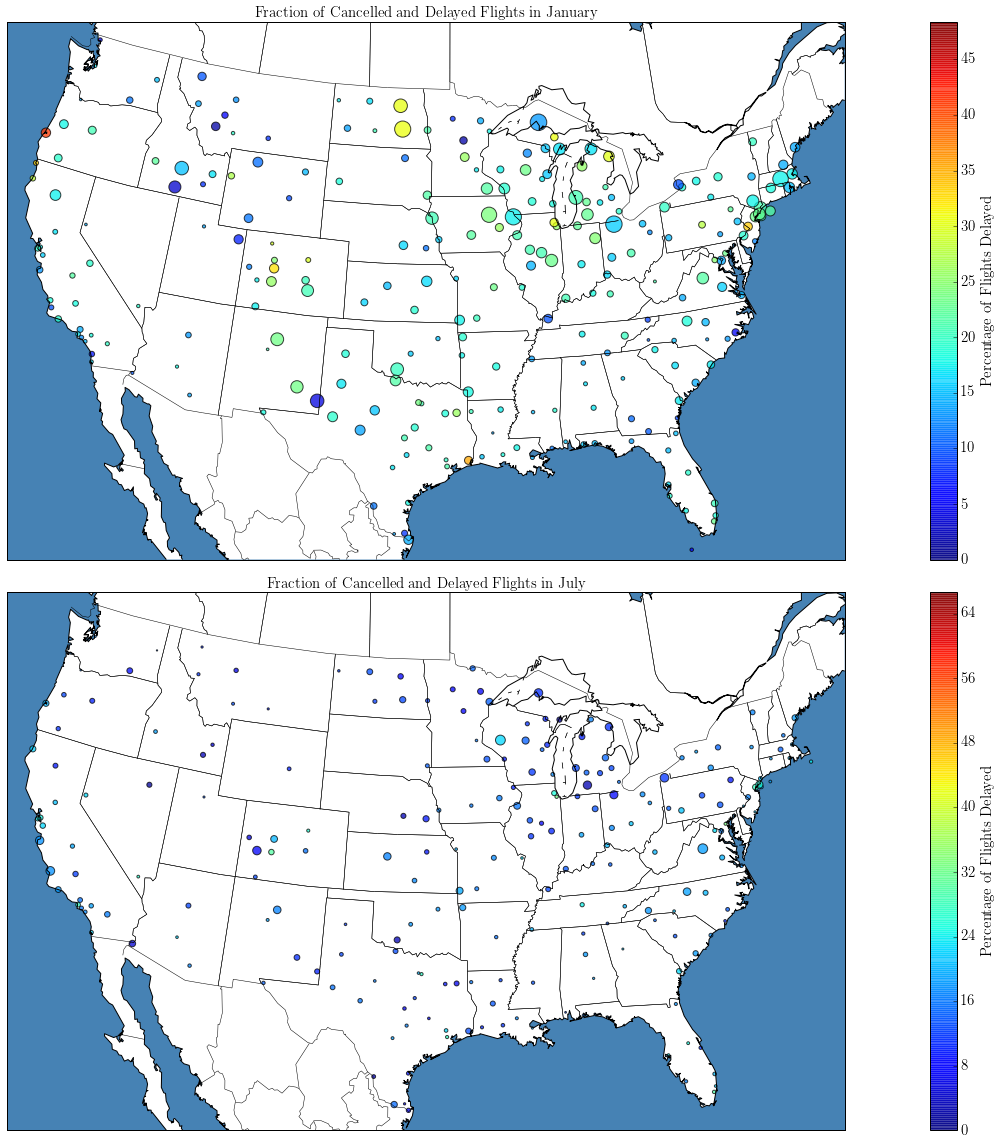

In [52]:
plt.figure(figsize=(24,16))

# Map of U.S. lower 48 adapted from fillstates.py
# available here: https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py

plt.subplot(211)
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95,
            resolution='l',area_thresh=100000.0)

m.drawcoastlines()
m.drawstates()
m.drawcountries()

m.fillcontinents(color = 'white', zorder=0)
m.drawmapboundary(fill_color='steelblue')

x,y = m(JanAirLoc['long'].values, JanAirLoc['lat'].values)

m.scatter(x, y, s=JanAirLoc['fracCancel']*1500., c=JanAirLoc['fracDelay']*100., cmap=colorScale, alpha=0.75)
plt.title('Fraction of Cancelled and Delayed Flights in January')
cbar = plt.colorbar()
cbar.set_label('Percentage of Flights Delayed')

plt.subplot(212)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95,
            resolution='l',area_thresh=100000.0)

m.drawcoastlines()
m.drawstates()
m.drawcountries()

m.fillcontinents(color = 'white', zorder=0)
m.drawmapboundary(fill_color='steelblue')

x,y = m(JulyAirLoc['long'].values, JulyAirLoc['lat'].values)

m.scatter(x, y, s=JulyAirLoc['fracCancel']*1500., c=JulyAirLoc['fracDelay']*100., cmap=colorScale, alpha=0.75)
plt.title('Fraction of Cancelled and Delayed Flights in July')
cbar = plt.colorbar()
cbar.set_label('Percentage of Flights Delayed')

plt.tight_layout()
plt.show()

The top map shows the flight delay and cancellation fractions for airports across the U.S. in January 2015 and the bottom for July 2015. The sizes of the points represent the cancellation fraction while the color scale represents the delay fraction. There doesn't seem to be a noticeable pattern in the locations of airports with higher fractions of delays and cancellations for the July data, whereas airports with the largest fractions of cancelled flights tend to cluster around the upper midwest and great lakes regions in the January data.

### Concluding remarks

This fast and straightforward analysis of the January and July 2015 flight data has revealed the following:

1. We can rule out the hypothesis that the January and July 2015 flight delay and cancellation fractions across all airports are the same at a 95% confidence level. 
2. The mean and median flight delay and cancellation fractions are higher in January than July. The difference is greater for the flight cancellation fractions than the delay fractions. In addition, the January flight cancellation fraction distribution has a larger standard deviation than the July distribution.
3. Visualizing the flight delay and cancellation fractions as a function of airport location in January reveals that the worst performing airports tend to be located in areas which traditionally have worse winter weather (e.g., the midwest and great lakes regions). Airport performance in July is globally better and more evenly distributed with no noticeable clustering near any particular areas.

More rigorous testing of the winter weather hypothesis could be done by including snow/ice accumulation data and performing a clustering analysis to assess a possible connection between extreme weather and airport performance. This analysis would also benefit from inclusion of data over a longer time range to investigate whether the flight delay and cancellation fractions show a cyclical seasonal variation, which would support the hypothesis that weather is a driving force behind airport performance.  